# Reading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import os

In [2]:
os.getcwd()

'/Users/elijahcurme/Desktop/GA/project_2'

In [3]:
os.listdir('.')

['.DS_Store',
 'submission_good.csv',
 'p2main.ipynb',
 'datasets',
 'dsi-us-10-project-2-regression-challenge',
 'README.md',
 'suggestions.md',
 '.ipynb_checkpoints',
 '.git',
 'p2main_copy.ipynb']

In [4]:
train = pd.read_csv('./dsi-us-10-project-2-regression-challenge/train.csv')
test = pd.read_csv('./dsi-us-10-project-2-regression-challenge/test.csv')

In [5]:
train.shape

(2051, 81)

In [6]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [7]:
#df.head().transpose()
pd.set_option('display.max_columns',100)
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


# Cleaning

## Train

### Mapping

**Many ordinal columns use this quality scale**

    Ex	Excellent
    Gd	Good
    TA	Typical/Average
    Fa	Fair
    Po	Poor

In [8]:
#Common ordinal scale
qual_dict = {
    'Po' : 1,
    'Fa' : 2,
    'TA' : 3,
    'Gd' : 4,
    'Ex' : 5
}

In [9]:
#Ordinals with unique scales
ordinal_dict = {
    'Lot Shape' : {'IR3' : 4, 'IR2' : 3, 'IR1' : 2, 'REG' : 1},
    'Utilities' : {'AllPub' : 4, 'NoSewr' : 3, 'NoSeWa' : 2, 'ELO' : 1},
    'Land Slope' : {'Gtl' : 3, 'Mod' : 2, 'Sev' : 1},
    'Bsmt Exposure' : {'Gd' : 4, 'Av' : 3, 'Mn' : 2, 'No' : 1},
    'BsmtFin Type 1' : {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1},
    'BsmtFin Type 2' : {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1},
    'Electrical' : {'SBrkr' : 5, 'FuseA' : 4, 'FuseF' : 3, 'FuseP' : 2, 'Mix' : 1},
    'Functional' : {'Typ' : 8, 'Min1' : 7, 'Min2' : 6, 'Mod' : 5, 'Maj1' : 4, 'Maj2' : 3, 'Sev' : 2, 'Sal' : 1},
    'Garage Finish' : {'Fin' : 3, 'RFn' : 2, 'Unf' : 1},
    'Paved Drive' : {'Y' : 3, 'P' : 2, 'N' : 1},
    'Fence' : {'GdPrv' : 4, 'MnPrv' : 3, 'GdWo' : 2, 'MnWw' : 1}
}

In [10]:
#Unique ordinals with nulls (Lot shape has nulls after mapping)
print(train['Bsmt Exposure'].isnull().sum())
print(train['BsmtFin Type 1'].isnull().sum())
print(train['BsmtFin Type 2'].isnull().sum())
print(train['Garage Finish'].isnull().sum())
print(train['Fence'].isnull().sum())

58
55
56
114
1651


In [11]:
def map_dict(cols):
    for col in cols:
        train[col] = train[col].map(ordinal_dict[col])

In [12]:
#Map unique ordinals
ordinallist = (list(train[['Lot Shape',
    'Utilities',
    'Land Slope',
    'Bsmt Exposure',
    'BsmtFin Type 1',
    'BsmtFin Type 2',
    'Electrical',
    'Functional',
    'Garage Finish',
    'Paved Drive',
    'Fence']]))

map_dict(ordinallist)

In [13]:
#Map common ordinals
train[['Exter Qual',
      'Exter Cond',
      'Bsmt Qual',
      'Bsmt Cond',
      'Heating QC',
      'Kitchen Qual',
      'Fireplace Qu',
      'Garage Qual',
      'Garage Cond',
      'Pool QC']] \
= train[['Exter Qual',
      'Exter Cond',
      'Bsmt Qual',
      'Bsmt Cond',
      'Heating QC',
      'Kitchen Qual',
      'Fireplace Qu',
      'Garage Qual',
      'Garage Cond',
      'Pool QC']].stack().map(qual_dict).unstack()

### Fill nulls with 0s

In [14]:
#Unique
train[['Lot Shape',
    'Bsmt Exposure',
    'BsmtFin Type 1',
    'BsmtFin Type 2',
    'Garage Finish',
    'Fence']] \
= train[['Lot Shape',
    'Bsmt Exposure',
    'BsmtFin Type 1',
    'BsmtFin Type 2',
    'Garage Finish',
    'Fence']].fillna(value = 0)

In [15]:
#Common
train[['Bsmt Qual', 
    'Bsmt Cond', 
    'Fireplace Qu', 
    'Garage Qual',
    'Garage Cond',
    'Pool QC']] \
= train[['Bsmt Qual', 
      'Bsmt Cond', 
      'Fireplace Qu', 
      'Garage Qual',
      'Garage Cond',
      'Pool QC']].fillna(value=0)

In [16]:
#Commenting out. Using interpolate below

#Other nulls to be filled
#train[['Total Bsmt SF', 
#      'Garage Area',
#      'Garage Cars']] \
#= train[['Total Bsmt SF', 
#         'Garage Area',
#        'Garage Cars']].fillna(value=0)

### Cast types

In [17]:
#Unique
train[['Lot Shape',
    'Bsmt Exposure',
    'BsmtFin Type 1',
    'BsmtFin Type 2',
    'Garage Finish',
    'Fence']] \
= train[['Lot Shape',
    'Bsmt Exposure',
    'BsmtFin Type 1',
    'BsmtFin Type 2',
    'Garage Finish',
    'Fence']].astype('int64')

In [18]:
#Common
train[['Exter Qual',
      'Exter Cond',
      'Bsmt Qual',
      'Bsmt Cond',
      'Heating QC',
      'Kitchen Qual',
      'Fireplace Qu',
      'Garage Qual',
      'Garage Cond',
      'Pool QC']] \
= train[['Exter Qual',
      'Exter Cond',
      'Bsmt Qual',
      'Bsmt Cond',
      'Heating QC',
      'Kitchen Qual',
      'Fireplace Qu',
      'Garage Qual',
      'Garage Cond',
      'Pool QC']].astype('int64')

In [19]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,2,Lvl,4,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,Y,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0,Attchd,1976.0,2,2.0,475.0,3,3,3,0,44,0,0,0,0,0,0,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,2,Lvl,4,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,Y,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3,Attchd,1997.0,2,2.0,559.0,3,3,3,0,74,0,0,0,0,0,0,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,0,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,Y,5,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,0,0,Detchd,1953.0,1,1.0,246.0,3,3,3,0,52,0,0,0,0,0,0,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,0,Lvl,4,Inside,3,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,Y,5,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,0,0,BuiltIn,2007.0,3,2.0,400.0,3,3,3,100,0,0,0,0,0,0,0,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,2,Lvl,4,Inside,3,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,Y,5,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,0,0,Detchd,1957.0,1,2.0,484.0,3,3,1,0,59,0,0,0,0,0,0,NaN,0,3,2010,WD,138500


## Test

In [20]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


### Mapping

In [21]:
def map_dict_test(cols):
    for col in cols:
        test[col] = test[col].map(ordinal_dict[col])

In [22]:
#Map unique ordinals for test
ordinallisttest = (list(test[['Lot Shape',
    'Utilities',
    'Land Slope',
    'Bsmt Exposure',
    'BsmtFin Type 1',
    'BsmtFin Type 2',
    'Electrical',
    'Functional',
    'Garage Finish',
    'Paved Drive',
    'Fence']]))

map_dict_test(ordinallisttest)

In [23]:
#Map common ordinals for test
test[['Exter Qual',
      'Exter Cond',
      'Bsmt Qual',
      'Bsmt Cond',
      'Heating QC',
      'Kitchen Qual',
      'Fireplace Qu',
      'Garage Qual',
      'Garage Cond',
      'Pool QC']] \
= test[['Exter Qual',
      'Exter Cond',
      'Bsmt Qual',
      'Bsmt Cond',
      'Heating QC',
      'Kitchen Qual',
      'Fireplace Qu',
      'Garage Qual',
      'Garage Cond',
      'Pool QC']].stack().map(qual_dict).unstack()

### Fill nulls

In [24]:
#Unique for test
test[['Lot Shape',
    'Bsmt Exposure',
    'BsmtFin Type 1',
    'BsmtFin Type 2',
    'Garage Finish',
    'Fence']] \
= test[['Lot Shape',
    'Bsmt Exposure',
    'BsmtFin Type 1',
    'BsmtFin Type 2',
    'Garage Finish',
    'Fence']].fillna(value = 0)

In [25]:
#Common for test
test[['Bsmt Qual', 
    'Bsmt Cond', 
    'Fireplace Qu', 
    'Garage Qual',
    'Garage Cond',
    'Pool QC']] \
= test[['Bsmt Qual', 
      'Bsmt Cond', 
      'Fireplace Qu', 
      'Garage Qual',
      'Garage Cond',
      'Pool QC']].fillna(value=0)

In [26]:
#Commenting out. Using interpolate below.

#Other nulls to be filled for test
#test[['Total Bsmt SF', 
#      'Garage Area',
#     'Garage Cars']] \
#= test[['Total Bsmt SF', 
#         'Garage Area',
#       'Garage Cars']].fillna(value=0)

In [27]:
train.interpolate(method = 'linear', limit_direction='forward', inplace = True)
test.interpolate(method = 'linear', limit_direction='forward', inplace = True)

### Cast types

In [28]:
#Unique test
test[['Lot Shape',
    'Bsmt Exposure',
    'BsmtFin Type 1',
    'BsmtFin Type 2',
    'Garage Finish',
    'Fence']] \
= test[['Lot Shape',
    'Bsmt Exposure',
    'BsmtFin Type 1',
    'BsmtFin Type 2',
    'Garage Finish',
    'Fence']].astype('int64')

In [29]:
#Common test
test[['Exter Qual',
      'Exter Cond',
      'Bsmt Qual',
      'Bsmt Cond',
      'Heating QC',
      'Kitchen Qual',
      'Fireplace Qu',
      'Garage Qual',
      'Garage Cond',
      'Pool QC']] \
= test[['Exter Qual',
      'Exter Cond',
      'Bsmt Qual',
      'Bsmt Cond',
      'Heating QC',
      'Kitchen Qual',
      'Fireplace Qu',
      'Garage Qual',
      'Garage Cond',
      'Pool QC']].astype('int64')

# EDA

### This EDA comes before dummies because dummy creation deletes the original column

In [30]:
train['MS Zoning'].isnull().sum()
train['Sale Type'].value_counts()

WD       1781
New       160
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Oth         4
Con         4
Name: Sale Type, dtype: int64

In [31]:
#Determining features to model on PRIOR to making dummies
display(train[['Foundation','SalePrice']].groupby(['Foundation']).agg(['mean']))
display(train[['Lot Config','SalePrice']].groupby(['Lot Config']).agg(['mean']))
display(train[['Condition 1','SalePrice']].groupby(['Condition 1']).agg(['mean']))
display(train[['Bldg Type','SalePrice']].groupby(['Bldg Type']).agg(['mean']))
display(train[['MS SubClass','SalePrice']].groupby(['MS SubClass']).agg(['mean']))
display(train[['House Style','SalePrice']].groupby(['House Style']).agg(['mean']))
display(train[['Bldg Type','SalePrice']].groupby(['Bldg Type']).agg(['mean']))
display(train[['Sale Type','SalePrice']].groupby(['Sale Type']).agg(['mean']))
display(train[['MS Zoning', 'SalePrice']].groupby(['MS Zoning']).agg(['mean']))
display(train[['Yr Sold', 'SalePrice']].groupby(['Yr Sold']).agg(['mean']))


,SalePrice
,mean
Foundation,
BrkTil,129050.190045
CBlock,148415.530707
PConc,227676.483801
Slab,108810.676471
Stone,143235.200000
Wood,173750.000000


,SalePrice
,mean
Lot Config,
Corner,180629.591954
CulDSac,230744.358779
FR2,174703.600000
FR3,198600.000000
Inside,177537.014637


,SalePrice
,mean
Condition 1,
Artery,128765.000000
Feedr,143223.605505
Norm,185007.310130
PosA,254733.333333
PosN,254794.296296
RRAe,139685.714286
RRAn,172604.777778
RRNe,129616.666667


,SalePrice
,mean
Bldg Type,
1Fam,185275.685882
2fmCon,123179.891304
Duplex,139296.333333
Twnhs,133100.000000
TwnhsE,198312.372671


,SalePrice
,mean
MS SubClass,
20,189305.488312
30,94936.346535
40,119125.000000
45,116372.727273
50,137270.000000
60,239225.769036
70,153354.455556
75,204875.000000


,SalePrice
,mean
House Style,
1.5Fin,136480.091743
1.5Unf,112466.666667
1Story,179809.194523
2.5Fin,243666.666667
2.5Unf,191785.714286
2Story,206408.963211
SFoyer,149343.920000
SLvl,166248.989362


,SalePrice
,mean
Bldg Type,
1Fam,185275.685882
2fmCon,123179.891304
Duplex,139296.333333
Twnhs,133100.000000
TwnhsE,198312.372671


,SalePrice
,mean
Sale Type,
COD,133574.523810
CWD,186635.000000
Con,241807.500000
ConLD,129091.352941
ConLI,207992.857143
ConLw,124600.000000
New,279021.056250
Oth,127497.750000


,SalePrice
,mean
MS Zoning,
A (agr),47300.000000
C (all),78010.894737
FV,218618.316832
I (all),57625.000000
RH,148859.571429
RL,191235.164581
RM,129119.142405


,SalePrice
,mean
Yr Sold,
2006,179471.609589
2007,185524.514056
2008,181750.372414
2009,182455.244395
2010,174180.059829


### Create dummies

In [32]:
#Custom dummies
train['after1960'] = np.where(train['Year Built'] > 1960, 1, 0)
train['all_flrs_SF'] = train['Total Bsmt SF'] + train['Gr Liv Area']

In [33]:
test['after1960'] = np.where(test['Year Built'] > 1960, 1, 0)
test['all_flrs_SF'] = test['Total Bsmt SF'] + test['Gr Liv Area']

In [34]:
#Auto dummies
train = pd.get_dummies(train, 
                       columns = ['MS Zoning', 
                                  'House Style', 
                                  'Sale Type', 
                                  'MS SubClass', 
                                  'Foundation', 
                                  'Lot Config',
                                  'Condition 1',
                                  'Bldg Type',
                                  'Yr Sold'],
                      drop_first = True)
test = pd.get_dummies(test, columns = ['MS Zoning', 
                                       'House Style', 
                                       'Sale Type', 
                                       'MS SubClass', 
                                       'Foundation',
                                       'Lot Config',
                                       'Condition 1',
                                       'Bldg Type',
                                       'Yr Sold'],
                     drop_first = True)
train.head()

,Id,PID,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Land Slope,Neighborhood,Condition 2,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,...,House Style_SFoyer,House Style_SLvl,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Yr Sold_2007,Yr Sold_2008,Yr Sold_2009,Yr Sold_2010
0,109,533352170,NaN,13517,Pave,NaN,2,Lvl,4,3,Sawyer,Norm,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,Y,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,544,531379050,43.0,11492,Pave,NaN,2,Lvl,4,3,SawyerW,Norm,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,Y,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,153,535304180,68.0,7922,Pave,NaN,0,Lvl,4,3,NAmes,Norm,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,Y,5,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,318,916386060,73.0,9802,Pave,NaN,0,Lvl,4,3,Timber,Norm,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,Y,5,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,255,906425045,82.0,14235,Pave,NaN,2,Lvl,4,3,SawyerW,Norm,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,Y,5,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
#Identify outliers
train[(train['all_flrs_SF'] > 10000) & (train['SalePrice'] < 200_000)]

,Id,PID,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Land Slope,Neighborhood,Condition 2,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,...,House Style_SFoyer,House Style_SLvl,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Yr Sold_2007,Yr Sold_2008,Yr Sold_2009,Yr Sold_2010
960,1499,908154235,313.0,63887,Pave,NaN,4,Bnk,4,3,Edwards,Norm,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,5,3,5,3,4,6,5644.0,1,0.0,466.0,6110.0,GasA,5,Y,5,4692,950,0,5642,2.0,0.0,2,1,3,1,5,12,8,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1885,2181,908154195,128.0,39290,Pave,NaN,2,Bnk,4,3,Edwards,Norm,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,5,3,5,3,4,6,4010.0,1,0.0,1085.0,5095.0,GasA,5,Y,5,5095,0,0,5095,1.0,1.0,2,1,2,1,5,15,8,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [36]:
#Remove outliers
train = train.drop([960, 1885])

In [37]:
train['Functional'].value_counts()

8    1913
7      42
6      42
5      29
4      12
3       7
1       2
2       2
Name: Functional, dtype: int64

In [38]:
#Commenting out, made dummy
#train['Yr Sold'].value_counts()

In [39]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.DataFrame(train.isnull().sum().head(100))

,0
Id,0
PID,0
Lot Frontage,1
Lot Area,0
Street,0
Alley,1909
Lot Shape,0
Land Contour,0
Utilities,0
Land Slope,0


In [40]:
#5 Cheapest, 5 most expensive
display(train.sort_values(by = 'SalePrice').head())
display(train.sort_values(by = 'SalePrice', ascending = False).head())

,Id,PID,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Land Slope,Neighborhood,Condition 2,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,...,House Style_SFoyer,House Style_SLvl,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Yr Sold_2007,Yr Sold_2008,Yr Sold_2009,Yr Sold_2010
1628,182,902207130,68.0,9656,Pave,NaN,0,Lvl,4,3,OldTown,Norm,2,2,1923,1970,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,2,2,1,1,0.0,1,0.0,678.0,678.0,GasA,3,N,5,832,0,0,832,0.0,0.0,1,0,2,1,3,5,8,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
183,1554,910251050,80.0,14584,Pave,NaN,0,Low,4,2,IDOTRR,Norm,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,2,1,0,0,0,0,0.0,0,0.0,0.0,0.0,Wall,1,N,4,733,0,0,733,0.0,0.0,1,0,2,1,2,4,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1309,727,902477120,60.0,7879,Pave,NaN,0,Lvl,4,3,IDOTRR,Norm,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,3,3,1,3,495.0,1,0.0,225.0,720.0,GasA,3,N,4,720,0,0,720,0.0,0.0,1,0,2,1,3,4,8,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1292,2844,909101330,60.0,8088,Pave,Grvl,0,Lvl,4,3,Edwards,Norm,2,3,1922,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,3,3,1,1,0.0,1,0.0,498.0,498.0,GasA,3,N,3,498,0,0,498,0.0,0.0,1,0,1,1,3,3,8,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1518,2881,911175430,50.0,9000,Pave,NaN,0,Lvl,4,3,IDOTRR,Norm,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,3,3,3,3,4,50.0,1,0.0,430.0,480.0,GasA,3,N,4,480,0,0,480,1.0,0.0,0,0,1,1,3,4,8,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,Id,PID,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Land Slope,Neighborhood,Condition 2,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,...,House Style_SFoyer,House Style_SLvl,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Yr Sold_2007,Yr Sold_2008,Yr Sold_2009,Yr Sold_2010
1671,45,528150070,100.0,12919,Pave,NaN,2,Lvl,4,3,NridgHt,Norm,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,5,3,5,3,4,6,2188.0,1,0.0,142.0,2330.0,GasA,5,Y,5,2364,0,0,2364,1.0,0.0,2,1,2,1,5,11,8,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1964,1638,527216080,52.0,51974,Pave,NaN,2,Lvl,4,3,StoneBr,Norm,9,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,710.0,5,3,5,3,3,6,1101.0,1,0.0,1559.0,2660.0,GasA,5,Y,5,2338,0,0,2338,1.0,0.0,2,1,4,1,4,8,8,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1692,2451,528360050,114.0,17242,Pave,NaN,2,Lvl,4,3,NoRidge,Norm,9,5,1993,1994,Hip,CompShg,MetalSd,MetalSd,BrkFace,738.0,4,4,5,3,4,3,292.0,6,1393.0,48.0,1733.0,GasA,5,Y,5,1933,1567,0,3500,1.0,0.0,3,1,4,1,5,11,8,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1796,434,528110090,107.0,13891,Pave,NaN,0,Lvl,4,3,NridgHt,Norm,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,5,3,5,3,4,1,0.0,1,0.0,1734.0,1734.0,GasA,5,Y,5,1734,1088,0,2822,0.0,0.0,3,1,4,1,5,12,8,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
151,2333,527212030,85.0,16056,Pave,NaN,2,Lvl,4,3,StoneBr,Norm,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,4,3,5,3,3,6,240.0,1,0.0,1752.0,1992.0,GasA,5,Y,5,1992,876,0,2868,0.0,0.0,3,1,4,1,5,11,8,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
train['SalePrice'].describe()

count      2049.000000
mean     181479.018058
std       79295.913255
min       12789.000000
25%      129800.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [42]:
train['all_flrs_SF'].describe()

count    2049.000000
mean     2549.033919
std       766.283633
min       334.000000
25%      2010.000000
50%      2457.000000
75%      2996.000000
max      6428.000000
Name: all_flrs_SF, dtype: float64

In [43]:
train['Year Remod/Add'].isnull().sum()

0

In [44]:

#Mean sale price by neighborhood
train[['Neighborhood','SalePrice']].groupby(['Neighborhood']).agg(['mean'])

,SalePrice
,mean
Neighborhood,
Blmngtn,200417.681818
Blueste,144566.666667
BrDale,103371.052632
BrkSide,127022.697368
ClearCr,217490.074074
CollgCr,202497.216667
Crawfor,205901.211268
Edwards,129905.787234


In [45]:
#Commenting out, made dummy
#Mean sale price by year sold
#train[['Yr Sold', 'SalePrice']].groupby(['Yr Sold']).agg(['mean'])

In [46]:
train[['after1960', 'SalePrice']].groupby(['after1960']).agg(['mean'])

,SalePrice
,mean
after1960,
0,132428.862411
1,207208.452381


In [47]:
pd.set_option('display.max_rows',100)
train.corr()[['SalePrice']].sort_values('SalePrice', ascending = False).head(15)

,SalePrice
SalePrice,1.000000
all_flrs_SF,0.825816
Overall Qual,0.803462
Gr Liv Area,0.719463
Exter Qual,0.715048
Kitchen Qual,0.694295
Total Bsmt SF,0.664740
Garage Area,0.655366
Garage Cars,0.648517
1st Flr SF,0.648252


In [48]:
print('Strongest correlations with price')
print('Overall Quality: ',np.corrcoef(train['SalePrice'], train['Overall Qual'])[0][1])
print('Garage Cars: ',np.corrcoef(train['SalePrice'], train['Garage Cars'])[0][1])
print('Garage Area: ',np.corrcoef(train['SalePrice'], train['Garage Area'])[0][1])
print('Exterior Quality: ',np.corrcoef(train['SalePrice'], train['Exter Qual'])[0][1])
print('Basement Quality: ',np.corrcoef(train['SalePrice'], train['Bsmt Qual'])[0][1])
print('All Floors SF: ',np.corrcoef(train['SalePrice'], train['all_flrs_SF'])[0][1])
print('Kitchen Quality: ',np.corrcoef(train['SalePrice'], train['Kitchen Qual'])[0][1])

Strongest correlations with price
Overall Quality:  0.8034623524018377
Garage Cars:  0.6485165233302882
Garage Area:  0.6553658817263681
Exterior Quality:  0.7150477522134521
Basement Quality:  0.6132363467901147
All Floors SF:  0.8258161150456051
Kitchen Quality:  0.6942952882539166


## Visuals

In [49]:
def line_of_best_fit(x, y):

    # Calculate the five "ingredients."
    y_bar = np.mean(y)
    x_bar = np.mean(x)
    std_y = np.std(y)
    std_x = np.std(x)
    r_xy = np.corrcoef(x, y)[0][1]

    # Calculate the betas.
    beta_1 = r_xy * (std_y / std_x)
    beta_0 = y_bar - (beta_1 * x_bar)

    # Return line of best fit.
    return (beta_1, beta_0)

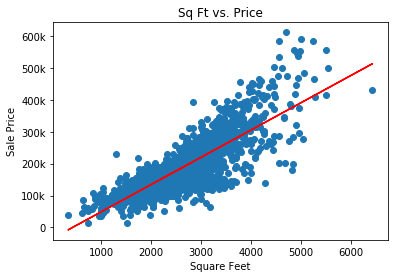

In [50]:
plt.scatter(train['all_flrs_SF'], train['SalePrice'])
plt.xlabel('Square Feet')
plt.ylabel('Sale Price')
plt.title('Sq Ft vs. Price')
plt.yticks([0, 100_000, 200_000, 300_000, 400_000, 500_000, 600_000], 
           ['0', '100k', '200k', '300k', '400k', '500k', '600k'])

m, b = line_of_best_fit(train['all_flrs_SF'],train['SalePrice'])
plt.plot(train['all_flrs_SF'], (m*train['all_flrs_SF'] + b), color = 'red');

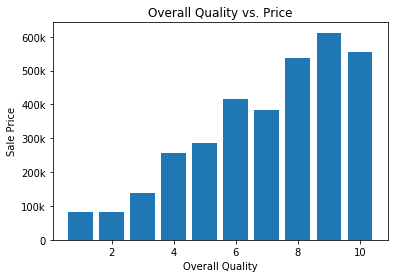

In [51]:
plt.bar(train['Overall Qual'], train['SalePrice'])
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Overall Quality vs. Price')
plt.yticks([0, 100_000, 200_000, 300_000, 400_000, 500_000, 600_000], 
           ['0', '100k', '200k', '300k', '400k', '500k', '600k']);

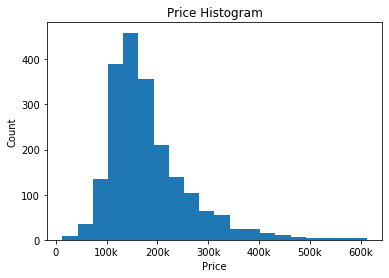

In [52]:
plt.hist(train['SalePrice'], bins = 20)
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Count')
plt.xticks([0, 100_000, 200_000, 300_000, 400_000, 500_000, 600_000], 
           ['0', '100k', '200k', '300k', '400k', '500k', '600k']);

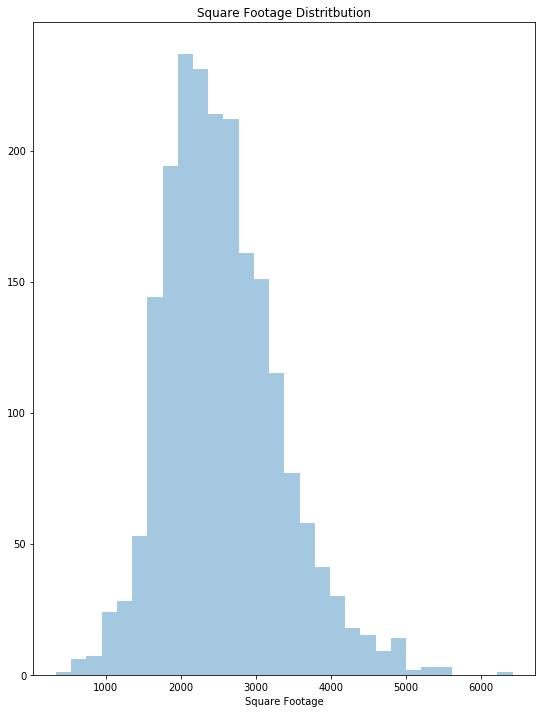

In [53]:
plt.figure(figsize = (9,12))
sns.distplot(train['all_flrs_SF'], bins = 30, kde = False)
plt.title('Square Footage Distritbution')
plt.xlabel('Square Footage');

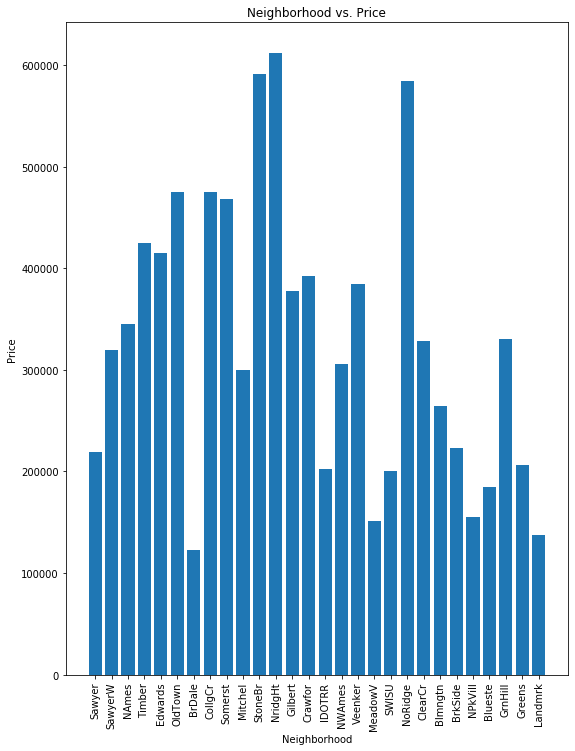

In [54]:
plt.figure(figsize = (9, 12))
plt.bar(train['Neighborhood'], train['SalePrice'])
plt.title('Neighborhood vs. Price')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
#plt.yticks([0, 200_000, 400_000, 600_000, 800_000], ['0', '200k', '400k', '600k', '800k'])
plt.xticks(rotation = 'vertical');

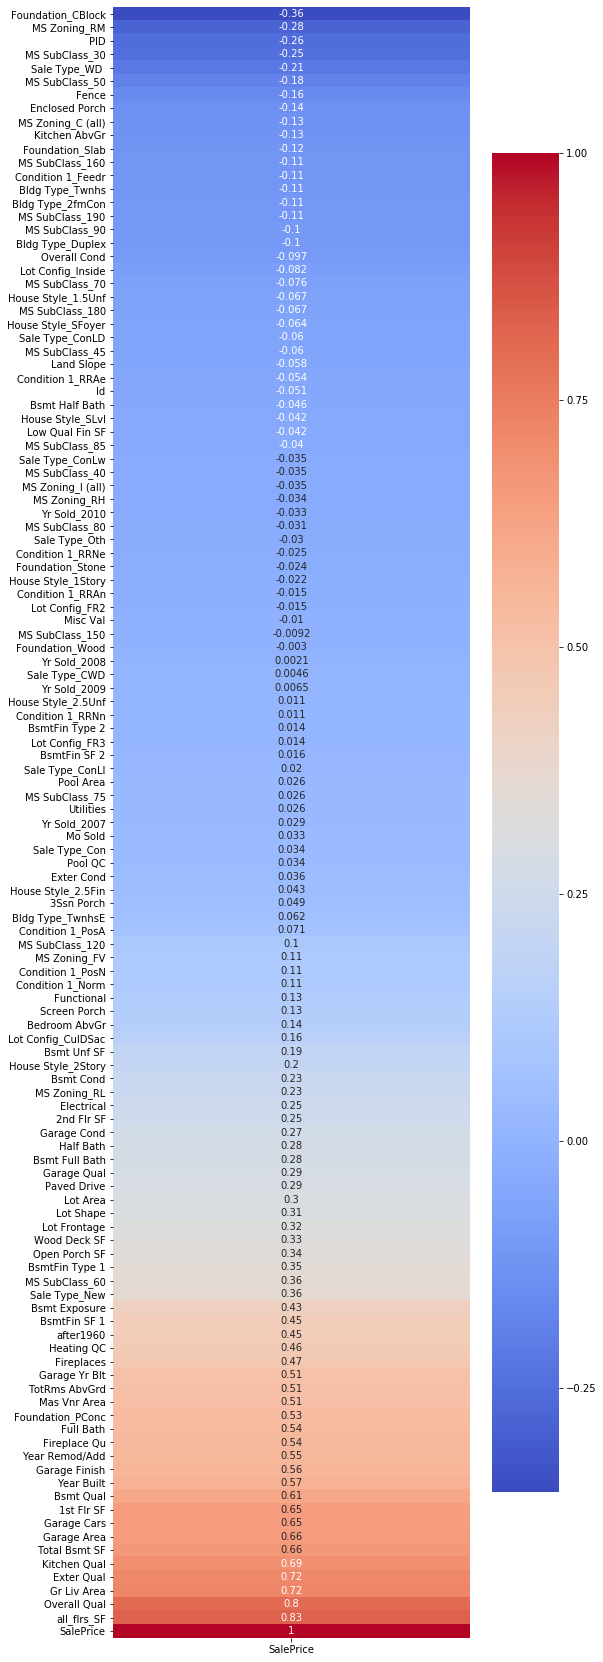

In [55]:
plt.figure(figsize = (8,30))
sns.heatmap(train.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = True), annot = True, cmap = 'coolwarm');

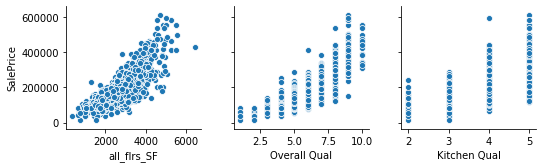

In [56]:
sns.pairplot(train, y_vars = ['SalePrice'], x_vars = ['all_flrs_SF', 'Overall Qual', 'Kitchen Qual']);

## Model

In [57]:
train.head()

,Id,PID,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Land Slope,Neighborhood,Condition 2,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,...,House Style_SFoyer,House Style_SLvl,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Yr Sold_2007,Yr Sold_2008,Yr Sold_2009,Yr Sold_2010
0,109,533352170,NaN,13517,Pave,NaN,2,Lvl,4,3,Sawyer,Norm,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,Y,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,544,531379050,43.0,11492,Pave,NaN,2,Lvl,4,3,SawyerW,Norm,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,Y,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,153,535304180,68.0,7922,Pave,NaN,0,Lvl,4,3,NAmes,Norm,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,Y,5,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,318,916386060,73.0,9802,Pave,NaN,0,Lvl,4,3,Timber,Norm,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,Y,5,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,255,906425045,82.0,14235,Pave,NaN,2,Lvl,4,3,SawyerW,Norm,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,Y,5,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [58]:
model = LinearRegression()

In [59]:
y = train['SalePrice']
features = ['Overall Qual', 
           'all_flrs_SF', 
           'Garage Cars', 
           'Exter Qual', 
           'Bsmt Qual', 
           'Kitchen Qual', 
           'Garage Area',

           'MS Zoning_FV',  
           'Lot Config_CulDSac',

           'Sale Type_New',
           'Bldg Type_TwnhsE',
           'House Style_1Story',
           'MS SubClass_60',
           'MS SubClass_70']

onhold = [   #'Lot Config_Corner',
         # 'MS SubClass_20',
            'MS Zoning_RL',
            'Foundation_PConc',
          'House Style_2Story',
          'MS SubClass_30',
          'Condition 1_PosA',
           'Condition 1_Artery',
            'Sale Type_COD',
           'Bldg Type_1Fam']
X = train[features]

### Train test split

In [60]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

In [62]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8495752459839447
0.8434405829437148


In [90]:
#Cross validation score of train test split
cross_val_score(model, X_train, y_train, cv = 5)

array([0.83543379, 0.87057556, 0.83293842, 0.8425869 , 0.85287843])

### Polynomial Features

In [84]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(include_bias = False)

In [100]:
# Create X_poly
X_poly = poly.fit_transform(X)

X_poly_df = pd.DataFrame(X_poly, columns = poly.get_feature_names(features))

In [101]:
model.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
#poly.get_feature_names(features)

In [102]:
X_poly_df.head()

,Overall Qual,all_flrs_SF,Garage Cars,Exter Qual,Bsmt Qual,Kitchen Qual,Garage Area,MS Zoning_FV,Lot Config_CulDSac,Sale Type_New,Bldg Type_TwnhsE,House Style_1Story,MS SubClass_60,MS SubClass_70,Overall Qual^2,Overall Qual all_flrs_SF,Overall Qual Garage Cars,Overall Qual Exter Qual,Overall Qual Bsmt Qual,Overall Qual Kitchen Qual,Overall Qual Garage Area,Overall Qual MS Zoning_FV,Overall Qual Lot Config_CulDSac,Overall Qual Sale Type_New,Overall Qual Bldg Type_TwnhsE,Overall Qual House Style_1Story,Overall Qual MS SubClass_60,Overall Qual MS SubClass_70,all_flrs_SF^2,all_flrs_SF Garage Cars,all_flrs_SF Exter Qual,all_flrs_SF Bsmt Qual,all_flrs_SF Kitchen Qual,all_flrs_SF Garage Area,all_flrs_SF MS Zoning_FV,all_flrs_SF Lot Config_CulDSac,all_flrs_SF Sale Type_New,all_flrs_SF Bldg Type_TwnhsE,all_flrs_SF House Style_1Story,all_flrs_SF MS SubClass_60,all_flrs_SF MS SubClass_70,Garage Cars^2,Garage Cars Exter Qual,Garage Cars Bsmt Qual,Garage Cars Kitchen Qual,Garage Cars Garage Area,Garage Cars MS Zoning_FV,Garage Cars Lot Config_CulDSac,Garage Cars Sale Type_New,Garage Cars Bldg Type_TwnhsE,...,Bsmt Qual Sale Type_New,Bsmt Qual Bldg Type_TwnhsE,Bsmt Qual House Style_1Story,Bsmt Qual MS SubClass_60,Bsmt Qual MS SubClass_70,Kitchen Qual^2,Kitchen Qual Garage Area,Kitchen Qual MS Zoning_FV,Kitchen Qual Lot Config_CulDSac,Kitchen Qual Sale Type_New,Kitchen Qual Bldg Type_TwnhsE,Kitchen Qual House Style_1Story,Kitchen Qual MS SubClass_60,Kitchen Qual MS SubClass_70,Garage Area^2,Garage Area MS Zoning_FV,Garage Area Lot Config_CulDSac,Garage Area Sale Type_New,Garage Area Bldg Type_TwnhsE,Garage Area House Style_1Story,Garage Area MS SubClass_60,Garage Area MS SubClass_70,MS Zoning_FV^2,MS Zoning_FV Lot Config_CulDSac,MS Zoning_FV Sale Type_New,MS Zoning_FV Bldg Type_TwnhsE,MS Zoning_FV House Style_1Story,MS Zoning_FV MS SubClass_60,MS Zoning_FV MS SubClass_70,Lot Config_CulDSac^2,Lot Config_CulDSac Sale Type_New,Lot Config_CulDSac Bldg Type_TwnhsE,Lot Config_CulDSac House Style_1Story,Lot Config_CulDSac MS SubClass_60,Lot Config_CulDSac MS SubClass_70,Sale Type_New^2,Sale Type_New Bldg Type_TwnhsE,Sale Type_New House Style_1Story,Sale Type_New MS SubClass_60,Sale Type_New MS SubClass_70,Bldg Type_TwnhsE^2,Bldg Type_TwnhsE House Style_1Story,Bldg Type_TwnhsE MS SubClass_60,Bldg Type_TwnhsE MS SubClass_70,House Style_1Story^2,House Style_1Story MS SubClass_60,House Style_1Story MS SubClass_70,MS SubClass_60^2,MS SubClass_60 MS SubClass_70,MS SubClass_70^2
0,6.0,2204.0,2.0,4.0,3.0,4.0,475.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,36.0,13224.0,12.0,24.0,18.0,24.0,2850.0,0.0,6.0,0.0,0.0,0.0,6.0,0.0,4857616.0,4408.0,8816.0,6612.0,8816.0,1046900.0,0.0,2204.0,0.0,0.0,0.0,2204.0,0.0,4.0,8.0,6.0,8.0,950.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,16.0,1900.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,225625.0,0.0,475.0,0.0,0.0,0.0,475.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7.0,3035.0,2.0,4.0,4.0,4.0,559.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49.0,21245.0,14.0,28.0,28.0,28.0,3913.0,0.0,7.0,0.0,0.0,0.0,7.0,0.0,9211225.0,6070.0,12140.0,12140.0,12140.0,1696565.0,0.0,3035.0,0.0,0.0,0.0,3035.0,0.0,4.0,8.0,8.0,8.0,1118.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,16.0,2236.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,312481.0,0.0,559.0,0.0,0.0,0.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5.0,2114.0,1.0,3.0,3.0,4.0,246.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25.0,10570.0,5.0,15.0,15.0,20.0,1230.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4468996.0,2114.0,6342.0,6342.0,8456.0,520044.0,0.0,0.0,0.0,0.0,2114.0,0.0,0.0,1.0,3.0,3.0,4.0,246.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,16.0,984.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,60516.0,0.0,0.0,0.0,0.0,246.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,5.0,1828.0,2.0,3.0,4.0,3.0,400.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,25.0,9140.0,10.0,15.0,20.0,15.0,2000.0,0.0,0

In [104]:
#Cross val score with poly
cross_val_score(model, X_poly, y, cv = 5)

array([0.86002338, 0.89314253, 0.8950215 , 0.87884083, 0.88562957])

### Standard Scaler

In [116]:
ss = StandardScaler()
ss.fit(X_poly)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [117]:
X_poly_scaled = ss.transform(X_poly)

In [118]:
model.fit(X_poly_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
Xtest_poly_scaled = ss.transform(Xtest_poly)

In [120]:
scaledpredictions = model.predict(Xtest_poly_scaled)

### Log

In [149]:
logy = np.log(y)

In [152]:
model.fit(X_poly, logy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
from sklearn.metrics import r2_score

transform_function = np.log
# transform_function = lambda x: x

inverse_transform = np.exp
# inverse_transform = lambda x: x

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 2)

log_model = LinearRegression().fit(X_train, transform_function(y_train))
log_preds = log_model.predict(X_test)
preds = inverse_transform(log_preds)
r2_score(y_test, preds)

0.8744857673183833

In [165]:
model.fit(X_poly,np.log(y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
logpreds = model.predict(Xtest_poly)

In [168]:
exppreds = np.exp(logpreds)

### Evaluate Model

In [91]:
def get_metrics(model,X,y):
    metrics_dict = {}
    
    preds = model.predict(X)
    errors = y - preds
    metrics_dict['mae'] = metrics.mean_absolute_error(y, preds) #np.mean(np.abs(errors))
    metrics_dict['sse'] = sum(errors ** 2)
    metrics_dict['mse'] = metrics.mean_squared_error(y, preds) #sse / len(y)
    metrics_dict['rmse'] = np.sqrt(metrics.mean_squared_error(y, preds)) #np.sqrt(np.mean((errors)**2))
    metrics_dict['r2'] = metrics.r2_score(y, preds)
    metrics_dict['r2_adj'] = r2_adj(model,X,y)
    return metrics_dict

In [92]:
def r2_adj(model,X,y):
    pred = model.predict(X)
    r2 = model.score(X,y)
    n = len(y)
    k = len(X.columns)
    return 1 - ( ((1 - r2)*(n - 1)) / (n - k - 1) )

In [105]:
get_metrics(model,X_poly_df,y)

{'mae': 17448.418320774537,
 'sse': 1227516574788.5662,
 'mse': 599080807.6078893,
 'rmse': 24476.12730004257,
 'r2': 0.9046774169924663,
 'r2_adj': 0.8987969673408871}

In [106]:
model.score(X_poly,y)

0.9046774169924664

In [107]:
preds = model.predict(X_poly)

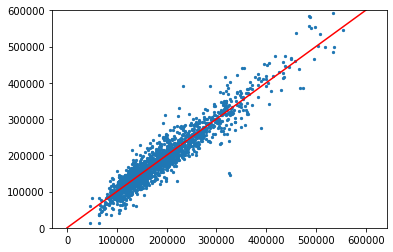

In [108]:
plt.scatter(preds, y, s = 5, alpha = 1)
plt.ylim(0,600_000)

m, b = line_of_best_fit(preds,y)
plt.plot([0, np.max(y)],
        [0,np.max(y)],
        color = 'red');

## Output

In [109]:
Xtest = test[features]

In [110]:
#Apply poly to test
Xtest_poly = poly.fit_transform(Xtest)

In [111]:
testpredictions = model.predict(Xtest_poly)

In [112]:
output = pd.DataFrame({'Id': test['Id']})

In [169]:
output['SalePrice'] = testpredictions

In [114]:
output.head()

,Id,SalePrice
0,2658,137963.477227
1,2718,193017.834747
2,2414,170681.368981
3,1989,124972.517167
4,625,176550.138488


In [171]:
output.to_csv('submission_good.csv', index=False)